### 미니배치 버전 파이썬 구현

In [3]:
import numpy as np

X = np.random.rand(10,2)
X

array([[0.51207176, 0.07482727],
       [0.05977375, 0.03501587],
       [0.19901423, 0.29235501],
       [0.64761183, 0.87246631],
       [0.56884365, 0.81995161],
       [0.29455914, 0.02447365],
       [0.7331866 , 0.46423448],
       [0.73163077, 0.89479288],
       [0.127178  , 0.07522481],
       [0.40066274, 0.90792202]])

In [4]:
W1 = np.random.rand(2,4)
W1

array([[0.07375378, 0.68886511, 0.16210787, 0.43783836],
       [0.32199162, 0.17518231, 0.43824421, 0.00275161]])

In [6]:
b1 = np.random.rand(4)
b1

array([0.30364394, 0.30572006, 0.13531587, 0.82646522])

In [7]:
H = np.matmul(X,W1) + b1
H

array([[0.36550492, 0.67157685, 0.25111935, 1.05087578],
       [0.31932729, 0.35303028, 0.16035116, 0.85273281],
       [0.41245786, 0.49402945, 0.29570054, 0.91440573],
       [0.6323346 , 0.90467792, 0.62265216, 1.11241521],
       [0.60961586, 0.84121763, 0.58686895, 1.07778298],
       [0.3332491 , 0.51291893, 0.19379166, 0.95550185],
       [0.50719883, 0.8921124 , 0.45761926, 1.14875983],
       [0.64572028, 0.96646686, 0.64605678, 1.14926336],
       [0.33724556, 0.40650661, 0.18889926, 0.88235562],
       [0.62553762, 0.74077453, 0.59815803, 1.00438898]])

### 시그모이드 함수

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

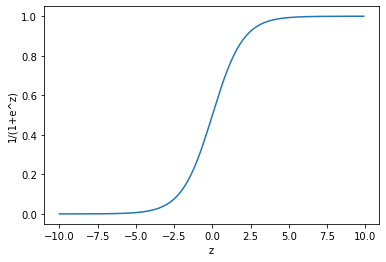

In [13]:
import matplotlib.pyplot as plt
zs = np.arange(-10,10,0.1)
gs = [sigmoid(z) for z in zs]
plt.plot(zs,gs)
plt.xlabel('z')   # z = - (X*W + b)
plt.ylabel('1/(1+e^z)')
plt.show()

In [14]:
# 1 Layer Logistic Regression(Binary classification)
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)
a = np.matmul(X,W1) + b1
h = sigmoid(a)
h

array([[0.76802146, 0.87316972, 0.67380589, 0.88829378],
       [0.65841716, 0.7670819 , 0.5254123 , 0.7382789 ],
       [0.71453085, 0.8435206 , 0.6573935 , 0.85626389],
       [0.63810165, 0.77945682, 0.5862905 , 0.77092925],
       [0.5807776 , 0.71791526, 0.51781488, 0.67966012],
       [0.73131482, 0.83593153, 0.60770643, 0.83707967],
       [0.77290345, 0.88653419, 0.71486517, 0.90779967],
       [0.6912362 , 0.80484374, 0.57747255, 0.79602349],
       [0.71285325, 0.81254397, 0.56603265, 0.80137467],
       [0.6624688 , 0.79113394, 0.58233308, 0.78245049]])

In [15]:
# 2 Layer Logistic Regression(Binary classification)
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)

W2 = np.random.rand(4,3)
b2 = np.random.rand(3)

# layer1
a1 = np.matmul(X,W1) + b1
s1 = sigmoid(a1)

# layer2
a2 = np.matmul(s1,W2) + b2
h = sigmoid(a2)
h

array([[0.88270212, 0.90260437, 0.71868126],
       [0.87285511, 0.89497914, 0.71019516],
       [0.87916726, 0.90213535, 0.71612533],
       [0.85557077, 0.88557566, 0.69670963],
       [0.8712525 , 0.89769903, 0.70973188],
       [0.88085127, 0.90336546, 0.71757125],
       [0.86506825, 0.89011899, 0.70390591],
       [0.87088534, 0.89843625, 0.70966022],
       [0.87263798, 0.89891567, 0.71094405],
       [0.87628245, 0.9010261 , 0.71389773]])

## 계층으로 클래스화 및 순전파 구현

In [16]:
# sigmoid layer의 순전파 구현
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self,x):
        return 1 / (1 + np.exp(-x))

# H(x) = W*X + b     
class Affine: # 행렬의 내적을 아핀(Affine) 변환이라고 하며, Affine 계층을 통해 이 변환을 수행처리함 
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self,x) :
        W,b = self.params
        out = np.dot(x,W) + b
        return out

In [18]:
#  모델 구현
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        I,H,O = input_size, hidden_size, output_size
        
        # Weight 과 bias 초기화
        W1 = np.random.rand(I,H)
        b1 = np.random.rand(H)
        
        W2 = np.random.rand(H,O)
        b2 = np.random.rand(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2),
            Sigmoid(),            
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
# t = TwoLayerNet(2,4,3) 
# t.params

In [19]:
# 모든 가중치를 모은다
#         self.params = []
#         for layer in self.layers:
#             self.params += layer.params
a = ['W1','b1']
a += ['W2','b2']
a

['W1', 'b1', 'W2', 'b2']

In [23]:
X = np.random.rand(10,2)
model = TwoLayerNet(2,4,3) # shape을 정확히 맞추어 설정
# 여기에서는 학습 수행 부분은 없음
# random 값을 그대로 가중치(파라메터)로 사용
s = model.predict(X)
print(s,s.shape)

[array([[0.97843844, 0.92553931, 0.63048501, 0.43356705],
       [0.37938367, 0.85414289, 0.47485417, 0.12267301]]), array([0.29531417, 0.37753938, 0.32716545, 0.5666009 ]), array([[0.58411331, 0.056289  , 0.04307618],
       [0.96941835, 0.88384421, 0.12428754],
       [0.12667095, 0.3692485 , 0.51824123],
       [0.05268935, 0.21676407, 0.28852326]]), array([0.96896068, 0.49248867, 0.10285974])]
[[0.90263994 0.8307338  0.68575349]
 [0.89918561 0.82806153 0.68191108]
 [0.92024861 0.85483136 0.7057    ]
 [0.88890701 0.81434641 0.67295168]
 [0.90427919 0.8350501  0.68676603]
 [0.90236973 0.83013174 0.68557021]
 [0.91208224 0.84390423 0.69549166]
 [0.90906239 0.83969457 0.69219873]
 [0.89953271 0.8268127  0.68272593]
 [0.91635994 0.85008093 0.70045891]] (10, 3)


In [24]:
model.params

[array([[0.97843844, 0.92553931, 0.63048501, 0.43356705],
        [0.37938367, 0.85414289, 0.47485417, 0.12267301]]),
 array([0.29531417, 0.37753938, 0.32716545, 0.5666009 ]),
 array([[0.58411331, 0.056289  , 0.04307618],
        [0.96941835, 0.88384421, 0.12428754],
        [0.12667095, 0.3692485 , 0.51824123],
        [0.05268935, 0.21676407, 0.28852326]]),
 array([0.96896068, 0.49248867, 0.10285974])]